In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [3]:
#importing data
dataset = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/13_KNN/glass.csv")

In [4]:
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Text(0.5, 1.0, "Box plot of 'K'")

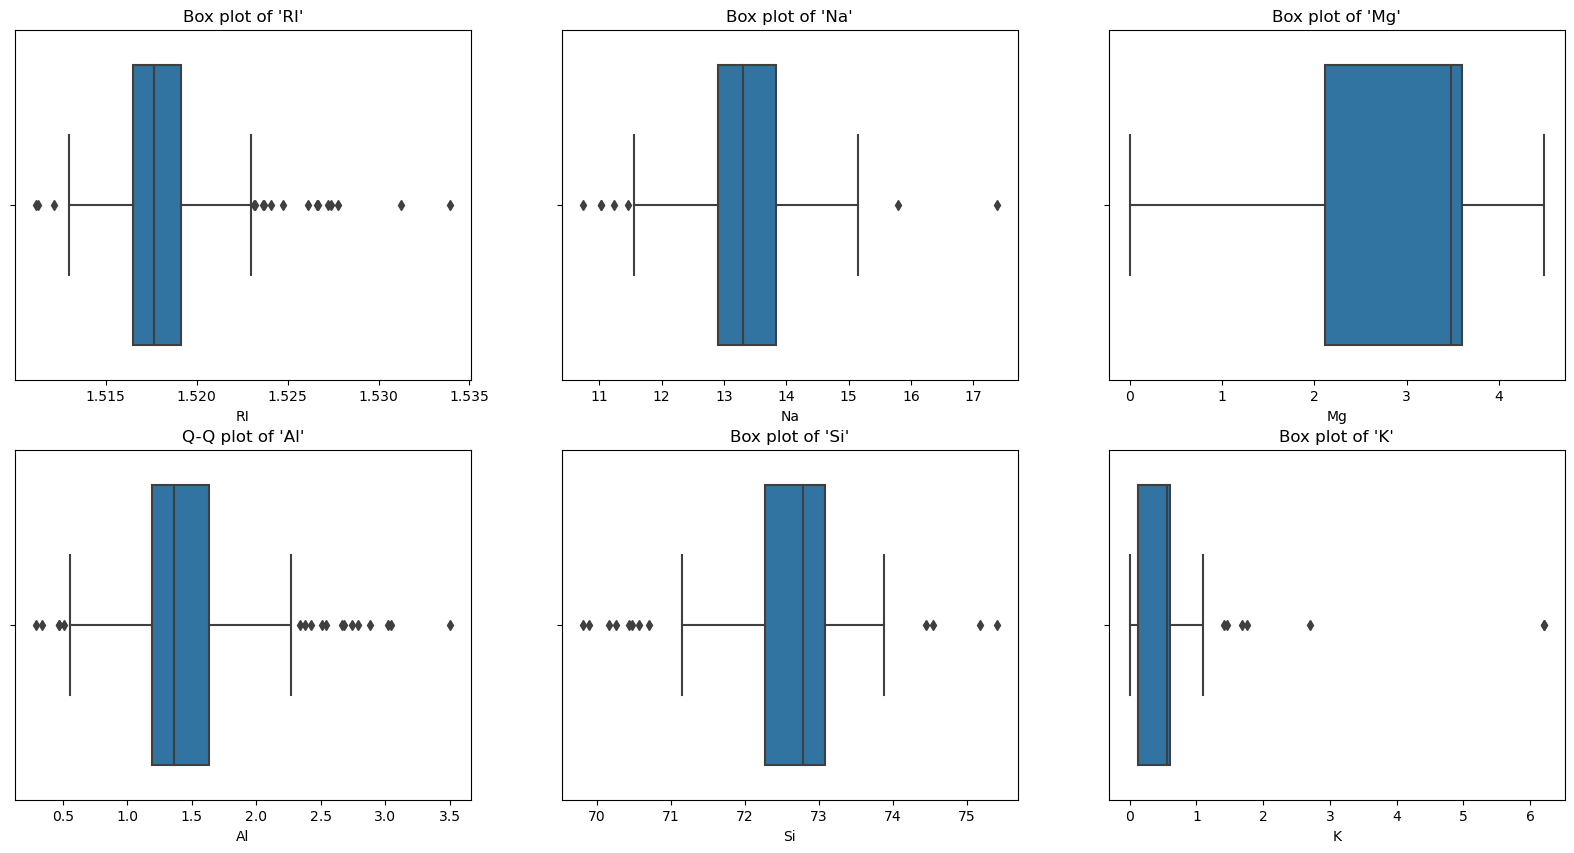

In [6]:
# # box plot
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.boxplot(dataset['RI'])
plt.title("Box plot of 'RI'")

plt.subplot(2,3,2)
sns.boxplot(dataset['Na'])
plt.title("Box plot of 'Na'")

plt.subplot(2,3,3)
sns.boxplot(dataset['Mg'])
plt.title("Box plot of 'Mg'")

plt.subplot(2,3,4)
sns.boxplot(dataset['Al'])
plt.title("Q-Q plot of 'Al'")

plt.subplot(2,3,5)
sns.boxplot(dataset['Si'])
plt.title("Box plot of 'Si'")

plt.subplot(2,3,6)
sns.boxplot(dataset['K'])
plt.title("Box plot of 'K'")



Text(0.5, 1.0, "Box plot of 'Type'")

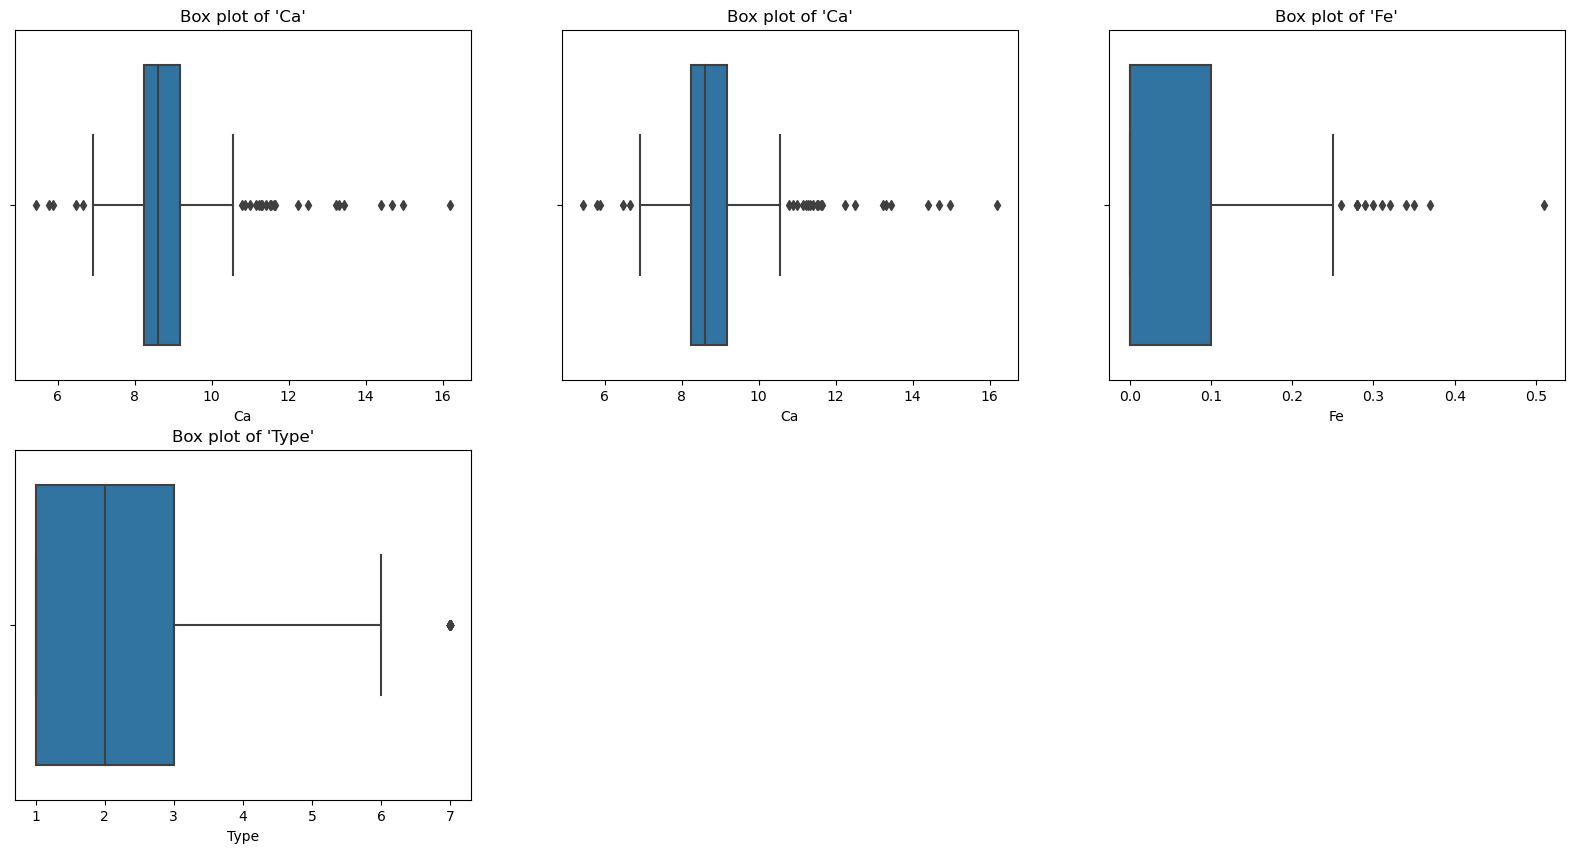

In [7]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.boxplot(dataset['Ca'])
plt.title("Box plot of 'Ca'")

plt.subplot(2,3,2)
sns.boxplot(dataset['Ca'])
plt.title("Box plot of 'Ca'")

plt.subplot(2,3,3)
sns.boxplot(dataset['Fe'])
plt.title("Box plot of 'Fe'")

plt.subplot(2,3,4)
sns.boxplot(dataset['Type'])
plt.title("Box plot of 'Type'")

In [8]:
def confusion_matrix(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=confusion)
    plt.show()


In [9]:
def classification_report(y_test,y_pred):
    # importing accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
    
    from sklearn.metrics import classification_report
    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred))
    

In [10]:
def ROC_AUC(y_test,y_pred_prob):
    fpr = {}
    tpr = {}
    thresh = {}
    roc_auc = dict()
    classes = np.unique(y_test)

    for i in range(len(classes)):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:, i-1], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], linestyle='--', label='%s vs Rest (AUC=%0.2f)' % (classes[i], roc_auc[i]))

    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()
    auc_score = roc_auc_score(y_test, y_pred_prob, multi_class='ovo', average='weighted')
    print("ROC_AUC Score = ", auc_score)

In [11]:
def data_preprocessing(dataset):
    X = dataset.iloc[:,:-1] # independant variables
    y = dataset.iloc[:,-1] #dependant variable

    #train test data split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
    
    return X_train, X_test, y_train, y_test

Accuracy of knn classifier on training set: 0.7719
Accuracy of knn classifier on test set: 0.5814


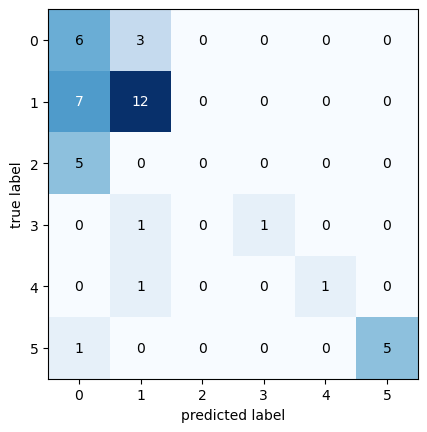


Accuracy: 0.58

Micro Precision: 0.58
Micro Recall: 0.58
Micro F1-score: 0.58

Macro Precision: 0.67
Macro Recall: 0.52
Macro F1-score: 0.56

Weighted Precision: 0.61
Weighted Recall: 0.58
Weighted F1-score: 0.57

Classification Report

              precision    recall  f1-score   support

           1       0.32      0.67      0.43         9
           2       0.71      0.63      0.67        19
           3       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       1.00      0.83      0.91         6

    accuracy                           0.58        43
   macro avg       0.67      0.52      0.56        43
weighted avg       0.61      0.58      0.57        43



ValueError: Expected 'estimator' to be a binary classifier, but got KNeighborsClassifier fit on multiclass (6 classes) data

In [13]:
def model(dataset):      
    X_train, X_test, y_train, y_test = data_preprocessing(dataset)
    from sklearn.neighbors import KNeighborsClassifier
    clf= KNeighborsClassifier()
    clf.fit(X_train, y_train)
    print('Accuracy of knn classifier on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of knn classifier on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test)
    y_pred_prob=clf.predict_proba(X_test)
    
    confusion_matrix(y_test,y_pred)

    classification_report(y_test,y_pred)

    ROC_AUC(y_test,y_pred_prob)

    
model(dataset)


Accuracy of knn classifier on training set: 0.7368
Accuracy of knn classifier on test set: 0.6512


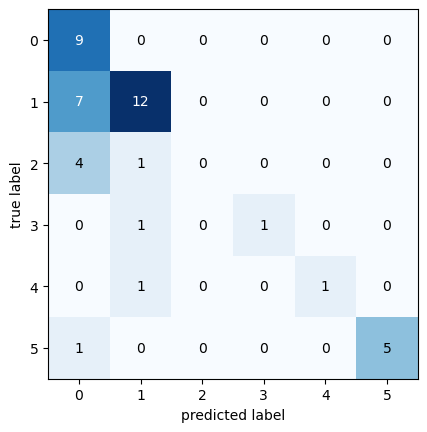


Accuracy: 0.65

Micro Precision: 0.65
Micro Recall: 0.65
Micro F1-score: 0.65

Macro Precision: 0.70
Macro Recall: 0.58
Macro F1-score: 0.59

Weighted Precision: 0.68
Weighted Recall: 0.65
Weighted F1-score: 0.63

Classification Report

              precision    recall  f1-score   support

           1       0.43      1.00      0.60         9
           2       0.80      0.63      0.71        19
           3       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       1.00      0.83      0.91         6

    accuracy                           0.65        43
   macro avg       0.70      0.58      0.59        43
weighted avg       0.68      0.65      0.63        43



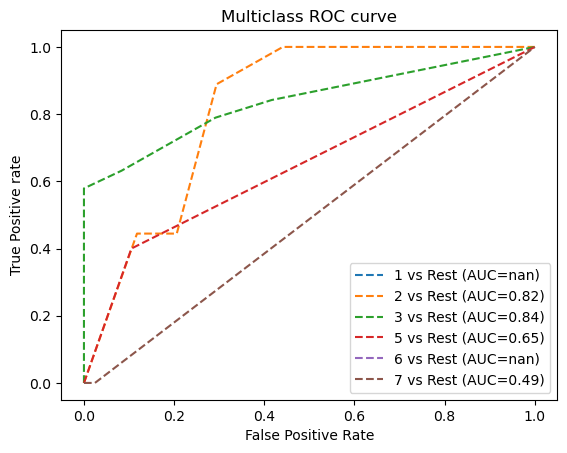

ROC_AUC Score =  0.838470692234462


In [26]:
def model_scaling(dataset):
    X_train, X_test, y_train, y_test = data_preprocessing(dataset)
      
    from sklearn.preprocessing import StandardScaler
    X_train=StandardScaler().fit_transform(X_train)
    X_test=StandardScaler().fit_transform(X_test)

    clf= KNeighborsClassifier()
    clf.fit(X_train, y_train)
    print('Accuracy of knn classifier on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of knn classifier on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test)
    y_pred_prob=clf.predict_proba(X_test)

    
    confusion_matrix(y_test,y_pred)

    classification_report(y_test,y_pred)

    ROC_AUC(y_test,y_pred_prob)
    
model_scaling(dataset)

In [27]:
##Hypertuning parameters
#List Hyperparameters that we want to tune.
X_train, X_test, y_train, y_test = data_preprocessing(dataset)

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(knn_2, hyperparameters, cv=5)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print(best_model.best_params_,best_model.best_score_)



{'leaf_size': 1, 'n_neighbors': 1, 'p': 1} 0.718655462184874


## After hypertuning the model is giving best accuracy. Hence this model can be used for glass type classification.
